# 01 Face Detection

![](https://images.unsplash.com/photo-1551034976-ed4608d88b04?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [Bill Mackie](https://unsplash.com/photos/ahrAuNeoc6w)

In the following notebook, we will apply a basic face detection algorithm, that will later reuse.

<h1> Load the image

In [7]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

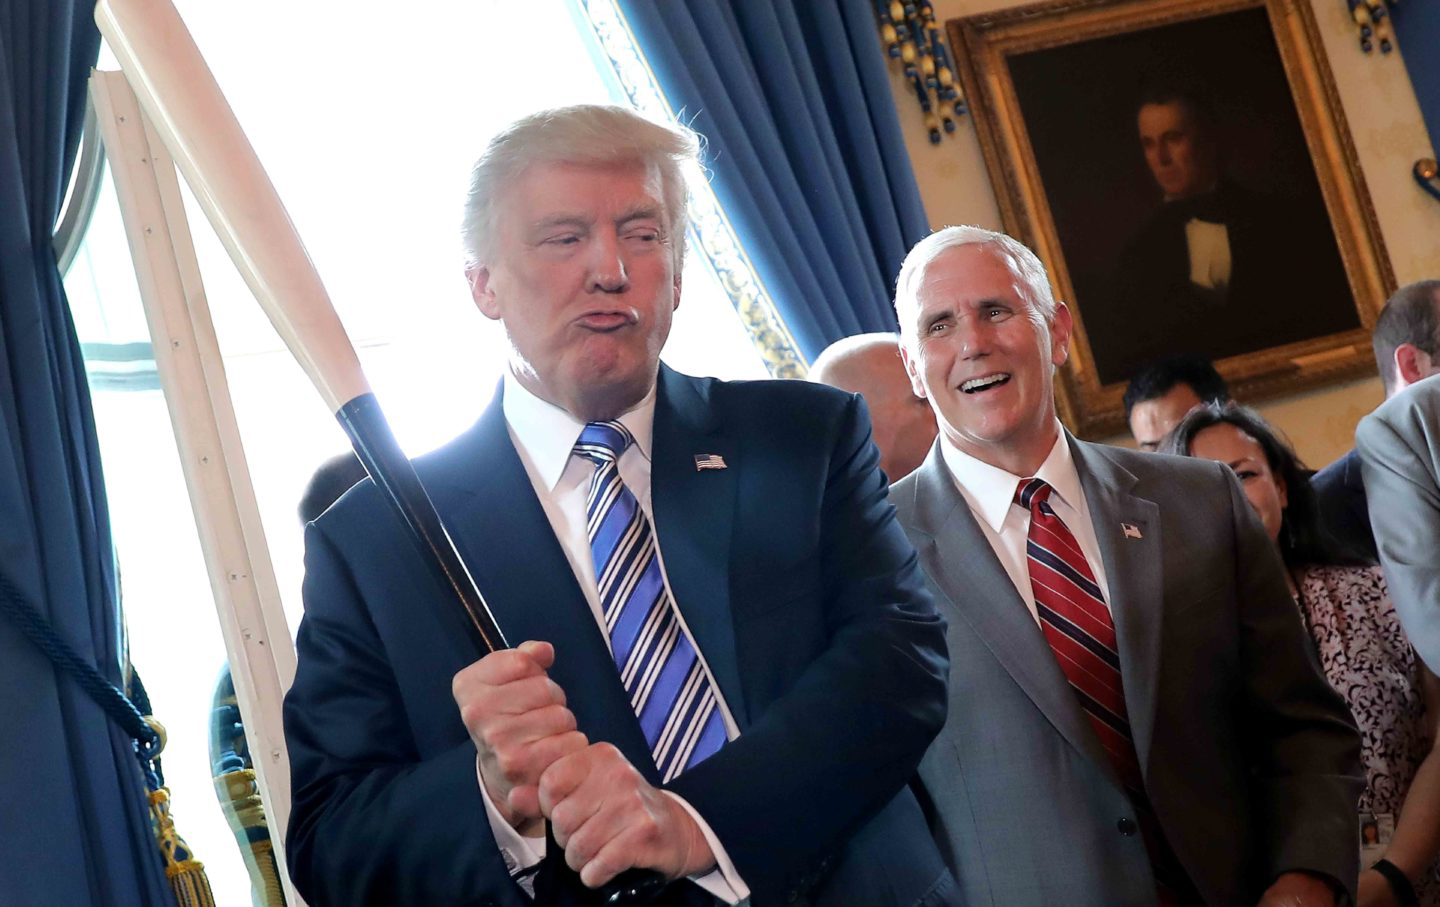

In [8]:
img = load_img("Trump-baseball.jpg")
img

In [29]:
img_array_raw = img_to_array(img).astype(np.uint8)
img_array = img_array_raw.copy()

<h1> OpenCV

We will now use openCV to identify the faces on this image.

In [30]:
import cv2
import numpy as np

The cascade classifier xml files

In [31]:
FACE_CASCADE_PATH = "/home/zyncus/bin/anaconda/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_default.xml"

In [32]:
# Instantiate a face cascade classifier
faceCascade = cv2.CascadeClassifier(FACE_CASCADE_PATH)

In [33]:
# TODO: Apply the classifier to your image
faces = faceCascade.detectMultiScale(img_array)
faces

array([[1125,  113,   73,   73],
       [ 516,  167,  179,  179],
       [  74,  316,   91,   91],
       [ 888,  257,  164,  164]], dtype=int32)

Using the `rectangle` object of openCV, display the image with the bounding boxes around the faces.

NB: One can use the `matplotlib.patches.Rectangle` as well.

In [34]:
for (x, y, w, h) in faces:
    cv2.rectangle(img_array, (x, y), (x+w, y+h), (255, 0, 0), 3)

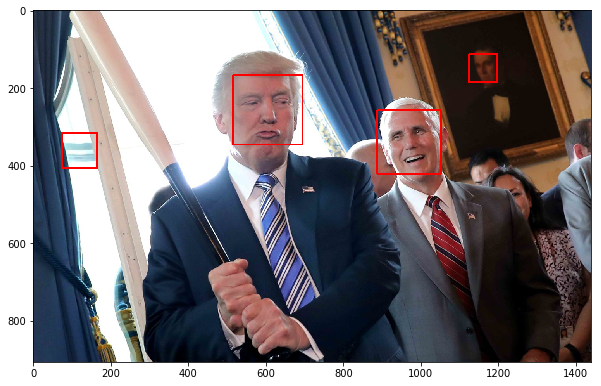

In [35]:
# TODO: display the image with bounding boxes around faces
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(img_array)
plt.show()

<h1> Hyperparameters

Let's play with some hyperparameters in the method `detectMultiScale`, specifically:
- scaleFactor: bigger scale factor will make your algorithm go faster, with less accuracy. A value between 1 and 1.3 is usual.
- minNeighbors: how many neighbors each candidate box should have to retain it. High values mean better accuracy, but less detections. A value around 5 might be a good option.
- minSize: the minimun size of a box, e.g. (30,30) for a square of 30 pixels side
- maxSize: maximum size of a box

Play with those hyperparameters to get a better result.

In [36]:
img_array2 = img_array_raw.copy()

In [37]:
# TODO: Play with hyperparameters to get a better result
faces_selected = faceCascade.detectMultiScale(img_array2, scaleFactor=1.2, minNeighbors=5, minSize=(30,30), maxSize=(200,200))

In [38]:
for (x, y, w, h) in faces_selected:
    cv2.rectangle(img_array2, (x, y), (x+w, y+h), (255, 0, 0), 3)

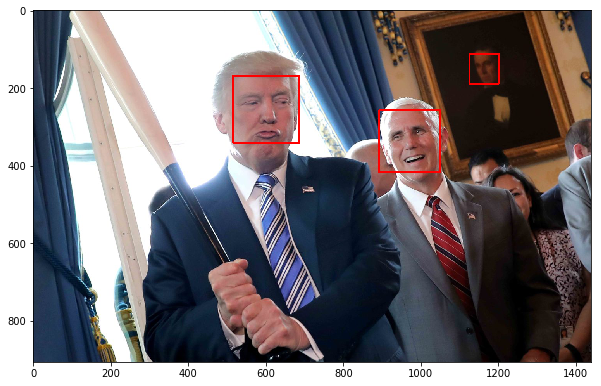

In [39]:
# TODO: display the image with bounding boxes around faces
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(img_array2)
plt.show()